# Classification of student performance data on a Math course using Support vector Machine

## Reading and organizing data into tabular form

Read info from csv, the data is non ordered in columns but in strings separated by semicolon ;

In [3]:
import pandas as pd
#Read data
energy_pd = pd.read_csv('student-mat.csv')
energy_pd.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


The data is not saved in a tabular manner. 

In [4]:
# get names of the columns and data into lists
columns_names = energy_pd.columns.tolist()
data = [energy_pd.iloc[i] for i in range(energy_pd.size)]

#separate the columns names into diferent elements of a list
columns_names = columns_names[0].split(";")

#separate the data into lists with each element being a value of a list
data = [d[0] for d in data]
data_clean = [d.split(";") for d in data]

In [5]:
#Create a Dataframe with the organized data
from pandas import DataFrame
df = DataFrame(data_clean, columns = columns_names )
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""","""course""","""mother""",2,2,0,"""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""","""no""",4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""","""course""","""father""",1,2,0,"""no""","""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""",5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""","""other""","""mother""",1,2,3,"""yes""","""no""","""yes""","""no""","""yes""","""yes""","""yes""","""no""",4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""","""home""","""mother""",1,3,0,"""no""","""yes""","""yes""","""yes""","""yes""","""yes""","""yes""","""yes""",3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""","""home""","""father""",1,2,0,"""no""","""yes""","""yes""","""no""","""yes""","""yes""","""no""","""no""",4,3,2,1,2,5,4,"""6""","""10""",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,"""M""",20,"""U""","""LE3""","""A""",2,2,"""services""","""services""","""course""","""other""",1,2,2,"""no""","""yes""","""yes""","""no""","""yes""","""yes""","""no""","""no""",5,5,4,4,5,4,11,"""9""","""9""",9
391,MS,"""M""",17,"""U""","""LE3""","""T""",3,1,"""services""","""services""","""course""","""mother""",2,1,0,"""no""","""no""","""no""","""no""","""no""","""yes""","""yes""","""no""",2,4,5,3,4,2,3,"""14""","""16""",16
392,MS,"""M""",21,"""R""","""GT3""","""T""",1,1,"""other""","""other""","""course""","""other""",1,1,3,"""no""","""no""","""no""","""no""","""no""","""yes""","""no""","""no""",5,5,3,3,3,3,3,"""10""","""8""",7
393,MS,"""M""",18,"""R""","""LE3""","""T""",3,2,"""services""","""other""","""course""","""mother""",3,1,0,"""no""","""no""","""no""","""no""","""no""","""yes""","""yes""","""no""",4,4,1,3,4,5,0,"""11""","""12""",10


Now the data is into tabular form

## Understand and visualize the data

In [6]:
# remove quotation mark
df = df.applymap(lambda d : d.replace('"',''))
# convert str to int
df = df.applymap(lambda d: int(d) if d.isdigit() else d)


In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Dealing with categorical columns

In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

#Label encoding for columns with 2 categories
#finding the columns with only 2 categories and apply to each one labelencoder
idx = df.nunique() == 2
columns = df.iloc[:,idx.values].columns.tolist()

for c in columns:
  df[c] = labelencoder.fit_transform(df[c])



In [9]:
# Binary encode all the rest of the categorical values
!pip install category_encoders


     |████████████████████████████████| 81kB 4.0MB/s 


In [10]:
import category_encoders as ce
import numpy as np

# finding the columns with more than 3 categories but less than 9
idx = np.logical_and(df.nunique() > 2, df.nunique() < 9)
columns = df.iloc[:,idx.values].columns.tolist()

# Binary encoding those columns.
encoder = ce.BinaryEncoder(cols=columns)
df = encoder.fit_transform(df)

df.info()
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 76 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   school        395 non-null    int64
 1   sex           395 non-null    int64
 2   age_0         395 non-null    int64
 3   age_1         395 non-null    int64
 4   age_2         395 non-null    int64
 5   age_3         395 non-null    int64
 6   address       395 non-null    int64
 7   famsize       395 non-null    int64
 8   Pstatus       395 non-null    int64
 9   Medu_0        395 non-null    int64
 10  Medu_1        395 non-null    int64
 11  Medu_2        395 non-null    int64
 12  Medu_3        395 non-null    int64
 13  Fedu_0        395 non-null    int64
 14  Fedu_1        395 non-null    int64
 15  Fedu_2        395 non-null    int64
 16  Fedu_3        395 non-null    int64
 17  Mjob_0        395 non-null    int64
 18  Mjob_1        395 non-null    int64
 19  Mjob_2        395 non-null   

,school,sex,age_0,age_1,age_2,age_3,address,famsize,Pstatus,Medu_0,Medu_1,Medu_2,Medu_3,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Mjob_0,Mjob_1,Mjob_2,Mjob_3,Fjob_0,Fjob_1,Fjob_2,Fjob_3,reason_0,reason_1,reason_2,guardian_0,guardian_1,guardian_2,traveltime_0,traveltime_1,traveltime_2,studytime_0,studytime_1,studytime_2,failures_0,failures_1,failures_2,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel_0,famrel_1,famrel_2,famrel_3,freetime_0,freetime_1,freetime_2,freetime_3,goout_0,goout_1,goout_2,goout_3,Dalc_0,Dalc_1,Dalc_2,Dalc_3,Walc_0,Walc_1,Walc_2,Walc_3,health_0,health_1,health_2,health_3,absences,G1,G2,G3
0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,6,5,6,6
1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,4,5,5,6
2,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,10,7,8,10
3,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,2,15,14,15
4,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,4,6,10,10


## Adjusting the problem to a binary classification

In [11]:
# change G3 to pass is greater than 10 otherwise fail

df.G3 = df.G3.apply(lambda x: 1 if x>=10 else -1)


## Dealing with imbalance classes

 1    265
-1    130
Name: G3, dtype: int64

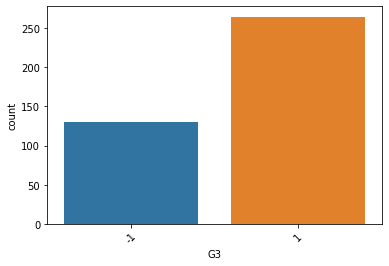

In [12]:
# plot count of labels, to observe if classes are not balanced
import matplotlib.pyplot as plt
import seaborn as sns

# graph to show count of G3 values
chart = sns.countplot(x = 'G3', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

df.G3.value_counts()

In [13]:
from imblearn.over_sampling import SMOTE
# using SMOTE for class imbalance
x = df.iloc[:,0:(len(df.columns)-3)]
y = df['G3']
x_res, y_res = SMOTE(k_neighbors=4).fit_resample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


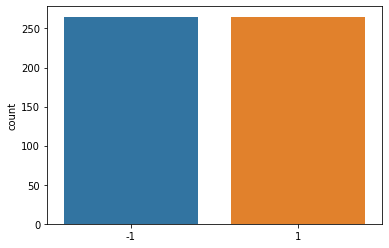

In [14]:
chart = sns.countplot(y_res)

## Training SVM

In [15]:
# train model using Linear Regression
import sklearn as sk
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=0)
y_train = np.ravel(y_train)

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Results

In [16]:
# Report
from sklearn.metrics import classification_report
y_pred = SVM.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.77      0.70      0.73        86
           1       0.68      0.75      0.71        73

    accuracy                           0.72       159
   macro avg       0.72      0.73      0.72       159
weighted avg       0.73      0.72      0.72       159



In [17]:
# Accuracy
print('Accuracy of Support vector machine classifier on test set: {:.2f}'.format(SVM.score(X_test,y_test)))


Accuracy of Support vector machine classifier on test set: 0.72
